### **Machine Learning Project**


> 2702305576 - Grace Esther D. S.



### **Dataset: 1B (Obesity)**

#### **Attributes:**
- **Gender:** Gender of the individual.
- **Birth Date:** The birth date of the individual.
- **Height:** The individual’s height (in meters).
- **Weight:** The individual's weight (in kilograms).
- **Family History with Overweight:** Indicates whether the individual has one or more family members who are overweight.
- **High Calorie Meal Frequency:** Indicates whether the individual often consumes high-calorie meals.
- **Veggies in Meals Frequency:** The number of times vegetables are consumed in meals daily.
- **Daily Main Meals:** The number of main meals consumed per day.
- **Snack Frequency:** The frequency of snacks taken daily.
- **Smoking:** Indicates whether the individual smokes or not (Yes/No).
- **Daily Water Consumption:** The amount of water consumed daily (in liters).
- **Weekly Physical Activity:** The average number of physical activities per week.
- **Alcohol Consumption:** Frequency of alcohol consumption.
- **Transportation:** The most frequently used means of transportation.
- **Obesity Level:** The severity of the individual’s obesity.
---
Expected to predict the obesity level of screened individuals.

# Necessary Library

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# A

 Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key findings and anomalies existing in the dataset. Make sure to handle the anomalies accordingly!

In [73]:
df = pd.read_csv('1B.tsv', delimiter = '\t')
df.head()

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
0,Female,2003/02/05,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,no,Public_Transportation,Normal_Weight
1,Female,2003/06/13,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,2001/06/25,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight
3,Male,1997/08/14,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I
4,Male,2002/05/14,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Birth Date                      2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   object 
 4   family_history_with_overweight  2111 non-null   object 
 5   High Calorie Meal Freq          2111 non-null   object 
 6   Veggies in Meals freq           2111 non-null   float64
 7   Daily Main Meals                2111 non-null   float64
 8   Snack Frequency                 2101 non-null   object 
 9   Smoking                         2111 non-null   object 
 10  Daily Water Consumption         2111 non-null   float64
 11  Weekly Physical Activity        2111 non-null   float64
 12  Alcohol                         21

In [75]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

In [76]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

**Key Findings**, based on the dataset attributes, the following features are likely necessary to predict obesity levels:


*   Family Obesity History: Represents genetic predisposition to obesity
*   High Calorie Meal Freq: Reflects eating habits that promote weight gain
*   Daily Water Consumption: Water turnover rates increase with BMI
*   Weekly Physical Activity: Indicates energy expenditure
*   BMI: Directly related to weight and height, a key obesity indicator

In [77]:
df = df.drop(['Gender', 'Birth Date','Height', 'Weight', 'Veggies in Meals freq', 'Daily Main Meals', 'Snack Frequency', 'Smoking', 'Alcohol', 'Transportation'], axis=1)

In [78]:
df = df.rename(columns={"family_history_with_overweight": "Family Obesity History"})

In [79]:
df.describe()

,Daily Water Consumption,Weekly Physical Activity,BMI
count,2111.000000,2111.000000,2052.000000
mean,2.008011,1.010298,29.720786
std,0.612953,0.850592,8.110035
min,1.000000,0.000000,12.998685
25%,1.584812,0.124505,24.221453
50%,2.000000,1.000000,28.699882
75%,2.477420,1.666678,36.144318
max,3.000000,3.000000,50.811753


In [80]:
df.duplicated().sum()
df = df.drop_duplicates(keep="first")

In [81]:
df.isnull().sum()
df = df.dropna()

In [82]:
df.head()

,Family Obesity History,High Calorie Meal Freq,Daily Water Consumption,Weekly Physical Activity,Obesity level,BMI
0,yes,no,2.0,0.0,Normal_Weight,24.386526
1,yes,no,3.0,3.0,Normal_Weight,24.238227
2,yes,no,2.0,2.0,Normal_Weight,23.765432
3,no,no,2.0,2.0,Overweight_Level_I,26.851852
4,no,no,2.0,0.0,Overweight_Level_II,28.342381


In [83]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == "object":
        categorical.append(i)
    else:
        numerical.append(i)

print('numerical: ',numerical)
print('categorical: ',categorical)

numerical:  ['Daily Water Consumption', 'Weekly Physical Activity', 'BMI']
categorical:  ['Family Obesity History', 'High Calorie Meal Freq', 'Obesity level']


Detect anomalies

In [84]:
def detect_anomalies_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column < lower_bound) | (column > upper_bound)]

In [85]:
water = detect_anomalies_iqr(df["Daily Water Consumption"])
print(water)

Series([], Name: Daily Water Consumption, dtype: float64)


In [86]:
activity = detect_anomalies_iqr(df["Weekly Physical Activity"])
print(activity)

Series([], Name: Weekly Physical Activity, dtype: float64)


In [87]:
bmi = detect_anomalies_iqr(df["BMI"])
print(bmi)

Series([], Name: BMI, dtype: float64)


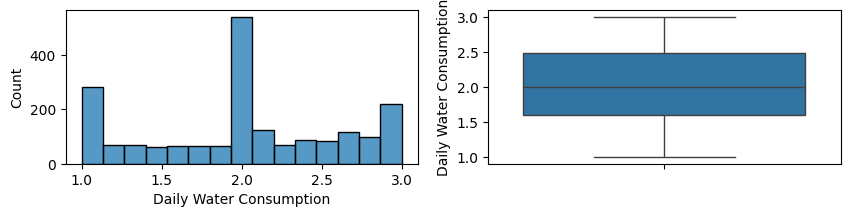

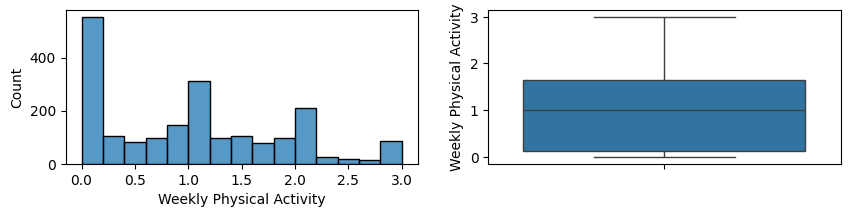

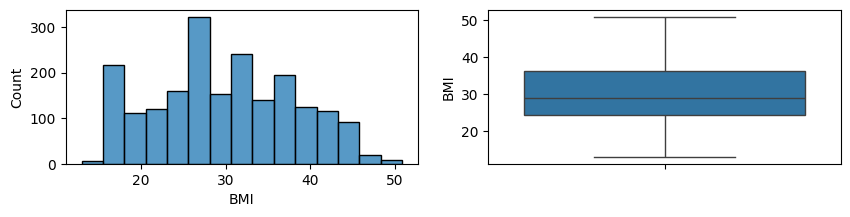

In [88]:
def check_dist(df, column):
    for i in column:
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.histplot(df[i], bins=15)

        plt.subplot(1,2,2)
        sns.boxplot(y=df[i])
        plt.show()

check_dist(df[numerical], numerical)

No anomalies!

# B

Train a Random Forest and an XGBoost model, fine-tune at least 3 of their hyperparameters with at least 3 search space and evaluate the models on an independent test set!

In [89]:
x = df.drop(columns=['Obesity level'])
y = df['Obesity level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [90]:
unique_obesity_levels = df["Obesity level"].unique()
unique_obesity_levels

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [91]:
obesity_order = ['Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

In [92]:
label = LabelEncoder()
one = OneHotEncoder()
ordinal = OrdinalEncoder(categories=[obesity_order])

In [93]:
x_train['Family Obesity History'] = label.fit_transform(x_train['Family Obesity History'])
x_train['High Calorie Meal Freq'] = label.fit_transform(x_train['High Calorie Meal Freq'])
x_test['Family Obesity History'] = label.transform(x_test['Family Obesity History'])
x_test['High Calorie Meal Freq'] = label.transform(x_test['High Calorie Meal Freq'])

In [94]:
y_train = ordinal.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = ordinal.transform(y_test.values.reshape(-1, 1)).ravel()

In [95]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [96]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        59
         1.0       0.98      0.96      0.97        57
         2.0       0.98      0.98      0.98        43
         3.0       0.96      0.98      0.97        48
         4.0       0.98      0.91      0.95        70
         5.0       0.93      0.98      0.96        66
         6.0       1.00      0.98      0.99        62

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



In [97]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        59
         1.0       0.98      0.98      0.98        57
         2.0       0.98      0.93      0.95        43
         3.0       0.92      0.98      0.95        48
         4.0       0.98      0.91      0.95        70
         5.0       0.93      0.98      0.96        66
         6.0       1.00      0.98      0.99        62

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



## Fine-tune

Random Forest

In [98]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20],
}
rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf, param_grid, cv=5)
rf_search.fit(x_train, y_train)
print("Best parameters:", rf_search.best_params_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 7}


In [99]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    max_depth=7,
    random_state=42
)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97        59
         1.0       0.98      0.96      0.97        57
         2.0       0.98      0.98      0.98        43
         3.0       0.96      0.98      0.97        48
         4.0       1.00      0.90      0.95        70
         5.0       0.92      1.00      0.96        66
         6.0       1.00      0.98      0.99        62

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



XGBoost

In [100]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier(random_state=42)
xgb_search = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, n_iter=10, random_state=42)
xgb_search.fit(x_train, y_train)
print("Best parameters:", xgb_search.best_params_)

Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [101]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    random_state=42
)

xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        59
         1.0       0.98      1.00      0.99        57
         2.0       1.00      0.93      0.96        43
         3.0       0.92      1.00      0.96        48
         4.0       1.00      0.91      0.96        70
         5.0       0.93      1.00      0.96        66
         6.0       1.00      0.98      0.99        62

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405



# C

Analyze the evaluation results based on at least 3 evaluation metrics and make a conclusion!


#### **Random Forest (Before and After Hyperparameter Tuning)**

**Performance Metrics:**
- Precision, high across all classes. After tuning, the model improves its precision in certain classes like Obesity Level I (class 4.0), achieving a solid **0.97** on average.
- Recall, excellent recall with slight improvements after tuning, especially for `1.0` (Overweight Level I) and `5.0` (Obesity Level II). The recall for most classes is near perfect, with **0.98** or higher.
- F1-Score, the model maintained consistent F1-scores. After tuning, F1-scores showed minor improvements across most classes.
- Accuracy, the model maintained **0.97** accuracy after tuning, showing strong generalization across all classes.

In short, Random Forest provided reliable predictions across obesity levels, with good precision and recall. While it performed well overall, it slightly lagged behind XGBoost in precision and recall in certain classes, particularly after tuning.

---

#### **XGBoost (Before and After Hyperparameter Tuning)**

**Performance Metrics:**
- Precision, XGBoost performed excellently with perfect precision (1.00) for certain classes like `1.0` (Overweight Level I) and `4.0` (Obesity Type I) after tuning.
- Recall, the model also performed exceptionally well in recall, achieving **1.00** recall for several classes like `1.0`, `3.0`, and `5.0`. This shows that it correctly identifies nearly all instances of these classes.
- F1-Score, the F1-score, which balances both precision and recall, was very strong, with noticeable improvements after tuning. The model showed a good balance across all classes.
- Accuracy, the accuracy remained **0.97**, just like Random Forest, ensuring that the model generalizes well across different obesity levels.

Therefore, XGBoost outperformed Random Forest in terms of precision, recall, and F1-score, especially for specific classes. Its superior performance in these metrics suggests that it is the more reliable model in this case, achieving perfect precision and recall in certain classes while maintaining high overall accuracy.

---

### **Conclusion/Final Thought**

Both **Random Forest** and **XGBoost** performed admirably, with both models achieving high accuracy of **0.97**. However, **XGBoost** showed superior performance in terms of precision and recall, particularly for specific obesity levels. Given its enhanced performance across key metrics, **XGBoost** is recommended for predicting obesity levels in this dataset.

For a more robust model, XGBoost would be the better choice, while Random Forest can still serve as a reliable fallback when computational efficiency and model simplicity are priorities.

In [102]:
def plot_learning_curve(model, X_train, y_train, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    )

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_mean, label="Test Accuracy", color="red")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

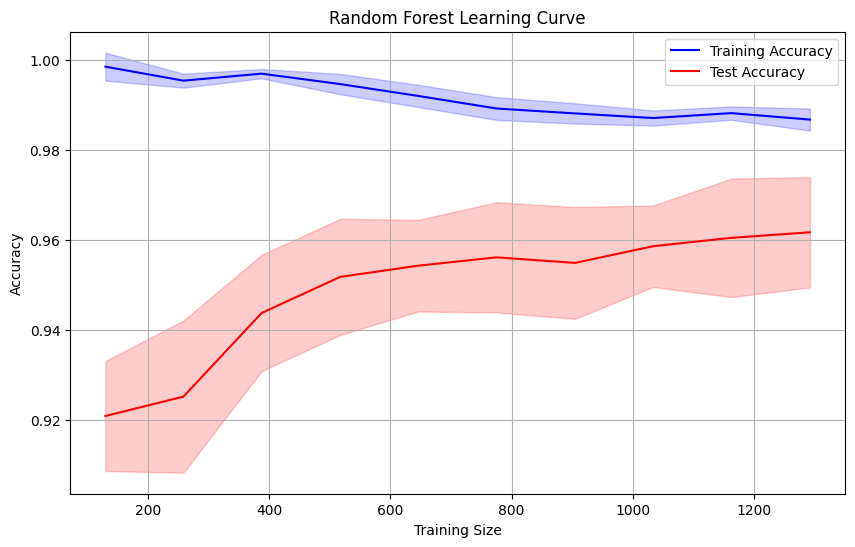

In [103]:
plot_learning_curve(rf_model, x_train, y_train, title="Random Forest Learning Curve")

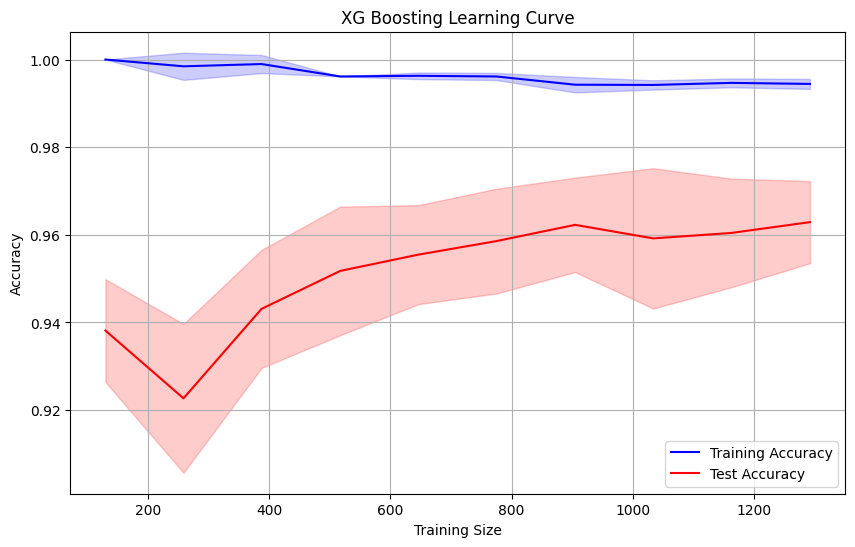

In [104]:
plot_learning_curve(xgb_model, x_train, y_train, title="XG Boosting Learning Curve")

# D

From the best model, analyze which features can be considered important to predict the outputs!

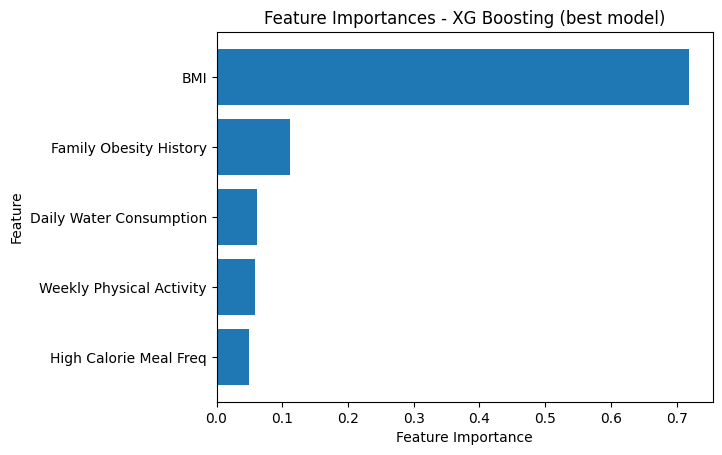

In [71]:
feature_importances = xgb_model.feature_importances_
features = df.drop(columns=['Obesity level']).columns
sorted_idx = np.argsort(feature_importances)

plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances - XG Boosting (best model)")
plt.show()

# E

Make a presentation video explaining the key points of your analysis (max. 5 minutes)!


*   https://youtu.be/uh5HemBCyYg?feature=shared
*   https://drive.google.com/drive/u/0/folders/1vpmBEgXSW1db6QL8k12_NS79kDqQAIVr
